# Title: Thomas Fire Analysis: AQI and False Color Image
By Caitlin Nordheim-Maestas

You can find more information on my GitHub Repository: https://github.com/cnordheim-maestas/thomas-fire-analyses.git

## About

A wildfire named the Thomas Fire in Santa Barbara County occurred in December 2017 and continued through mid January 2018. human impact background. aqi background. false color image background. 

### Purpose

We are looking into how the Air Quality Index may have changed throughout 2017 and 2018 in relation to the fire, and we are looking at in relation to the geographic location of the fire by overlaying the Thomas fire perimeter over a false color image of the surrounding area to look at the short-wave infrared (swir22) and near-infrared values. To look at the AQI throughout time,  calculate the rolling 5-day average AQI, then observe the average AQI and AQI readings over time, looking closely at December 2017 and January 2018. 

## Highlights of analyses
### Part 1: AQI Timeseries Analysis
- Import and clean timeseries data in geographical area of interest
- Calculate the rolling average AQI over a 5 day timespan
- Visualize the average AQI and AQI readings over time

### Part 2: False Color Map Spatial Analysis
- Import and clean timeseries data in geographical area of interest
- Calculate the roling average AQI over a 5 day timespan
- Visualize the average AQI and AQI readings over time

## Dataset descriptions

AQI Data:

we will use the AQI data collected from the United States Environmental Protection Agency Air Data (citation below) from 2017 and 2018. We will combine the datasets, select only the observations from Santa Barbara County. I will be using this data for Santa Barbara County for the years 2017 and 2018.

Landsat Collection 2:

To create the false color image to elucidate any patterns with the Thomas fire's location, we will utilize the United States Geological Survey Landsat Missions data hosted by Microsoft Planetary Computer (citation below). The data is created and curated by ..... I will be using this data for Santa Barbara County.

California Fire Perimeters:

We will plot the false color image, and overlay it with the perimeter of the Thomas fire. The Thomas fire perimeter is from the California Department of Forestry and Fire Protection (citation below), and we will first ensure it is in the same coordinate reference system as the Landsat data, then select only the data about the Thomas Fire, then we will overlay it with the map to look for patterns. I will be using a shapefile of only the Thomas Fire for this analysis.

### Data citations

United States Environmental Protection Agency Air Data (2023), daily_aqi_by_cbsa_2017.zip [Data file] Available from: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI. Access date: 11.27.2023.

United States Geological Survey Landsat Missions hosted by Microsoft Planetary Computer (2023), Landsat Collection 2 Level-2 [Data file] Available from: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. Access date: 11.27.2023.

California Department of Forestry and Fire Protection (2023), California Fire Perimeters (all) [Data file] Available from: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about. Access date: 11.27.2023.

## Contents
1. AQI Timeseries Analysis
 - 1A: AQI Import Libraries and Data Access 
 - 1B: AQI Data Cleaning & Geographical Context
 - 1C: AQI Data Exploration
 - 1D: AQI Data Analysis
 - 1E: AQI Data Visualization
 
2. False Color Map Spatial Analysis
 - 1A: AQI Import Libraries and Data Access 
 - 1B: AQI Geographical context & Data Cleaning
 - 1C: AQI Data exploration
 - 1D: AQI Data visualization
 
3. Final Output

## 1. AQI Timeseries Analysis

### 1A: AQI Import Libraries and Data Access

In [1]:
# Import libraries and functions
import pandas as pd # data manipulation & analysis

In [2]:
# import AQI 2017 data
# using the pandas read_csv function
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_17.head(2) # check it imported by viewing top 2 rows

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1


In [3]:
# import AQI 2018 data
# using the pandas read_csv function
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')
aqi_18.head(2) # check it imported by viewing top 2 rows

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1


### 1B: AQI Data Cleaning & Geographical Context

In [4]:
## AQI data cleaning
# glue the 2017 and 2018 files together using concatenate
aqi = pd.concat([aqi_17, aqi_18])
print('number of columns in merged dataset: ', len(aqi))
print('expecting this number of rows: ', len(aqi_17) + len(aqi_18))

# clean column names: make all lower case and replace spaces with underscores
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')
print('updated column names: ', aqi.columns.values) # confirm updated column names

## Geographical context: Santa Barbara only
# subset Santa Barbara: select rows where the county_name is santa barbara only
aqi_sb=aqi.loc[aqi.county_name=="Santa Barbara"]
print('unique counties in santa barbara subset (expecting only Santa Barbara): ', aqi_sb.county_name.unique())

## More data cleaning
# drop unecessary columns from subset: drop 'state_name', 'county_name', 'state_code' and 'county_code' columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code','county_code'])
print('updated column names in sb subset: ', aqi_sb.columns.values) # confirm updated column names

# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)
print('the data type for the date is now: ', aqi_sb.date.dtypes)

# set date coumn as index
aqi_sb = aqi_sb.set_index('date')
aqi_sb.head(2) # check new index

number of columns in merged dataset:  654338
expecting this number of rows:  654338
updated column names:  ['state_name' 'county_name' 'state_code' 'county_code' 'date' 'aqi'
 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting']
unique counties in santa barbara subset (expecting only Santa Barbara):  ['Santa Barbara']
updated column names in sb subset:  ['date' 'aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting']
the data type for the date is now:  datetime64[ns]


,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,36,Good,Ozone,06-083-4003,11


### 1C: AQI Data Exploration

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   aqi                        730 non-null    int64 
 1   category                   730 non-null    object
 2   defining_parameter         730 non-null    object
 3   defining_site              730 non-null    object
 4   number_of_sites_reporting  730 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 34.2+ KB
None
the range of aqi values is:  20 - 281


<AxesSubplot:title={'center':'Exploratory plot of SB AQI dataset'}, xlabel='date'>

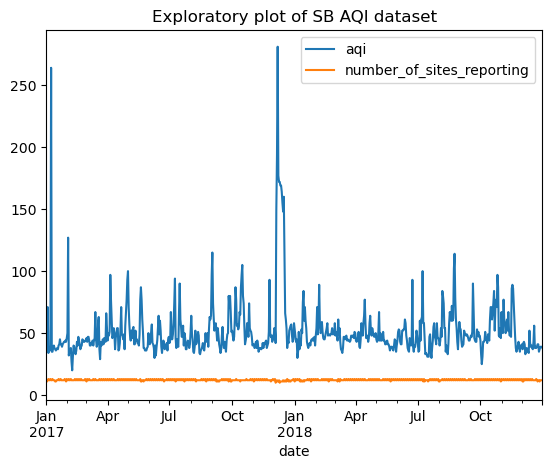

In [5]:
# AQI data
# Let's explore the cleaned aqi data, that just has Santa Barbara, and includes 2017 and 2018

# use the .info() function to see the datatypes, number of entries, and timeframe in the datetime index
print(aqi_sb.info())

# for fun, let's look at the range of the aqi values
print('the range of aqi values is: ', aqi_sb.aqi.min(), '-', aqi_sb.aqi.max())

aqi_sb.plot(title="Exploratory plot of SB AQI dataset") #preliminary plot

### 1D: AQI Data Analysis

In [6]:
# AQI analysis
# Broad goal: Determine if and how the AQI changes through time 2017-2018
# More specifically, does the average 5-day AQI show any important patterns throughout 2017-2018, keeping the thomas fire in mind?

# Analysis: calculate the 5-day rolling average and add it as a column

# add column with 5 day average AQI and calculate the 5 day rolling average using the "rolling" function
# '5D' corresponds to 5 day
# .mean() because we want the average
# adding a column using the syntax on the left

aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# let's check that it worked! 
print('updated column names (checking the five_day_average showed up): ', aqi_sb.columns.values) # confirm updated column names
# let's check the range of average values
print('the range of aqi 5 day average values is: ', aqi_sb.five_day_average.min(), '-', aqi_sb.five_day_average.max())

updated column names (checking the five_day_average showed up):  ['aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting' 'five_day_average']
the range of aqi 5 day average values is:  30.4 - 199.2


### 1E: AQI Data Visualization

<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

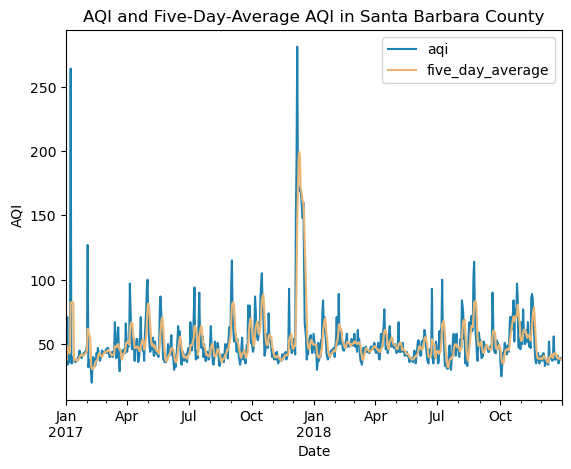

In [7]:
# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

## False Color Image (1): Importing libraries and data

In [8]:
# Import libraries and functions
import os # accessible file paths
import numpy as np # math operations
import pandas as pd # data manipulation & analysis
import geopandas as gpd # geospatial data manipulation
from shapely.geometry import Polygon
import xarray as xr # for n-dimmensional array data
import rioxarray as rioxr # for geospatial n-dimmensional array data
from rasterio.features import rasterize # for rasterizing polygons
# plotting
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for pretty legends

In [9]:
# import landsat data
# using rasterio 
# use the os to get the current working directory
land_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
land = rioxr.open_rasterio(land_fp) # use this for geospatial raster data
land # check it imported

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [ ]:
# fire perimeters in California during 2017
# using geopandas
# use the os to get the current working directory
fire_fp = os.path.join(os.getcwd(),'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp')
fire = gpd.read_file(fire_fp) # use gpd to read the file because it's a shapefile
fire.head(2) # check it imported by viewing top 2 rows

## False Color Image (2): Data cleaning and geographical context of data

In [ ]:
# Landsat data cleaning and geographic context
# Raster reduction: drop the bands in land data

# remove length 1 dimension (band)
land = land.squeeze()

# remove coordinates associated to band
land = land.drop('band')
land

In [ ]:
# Fire perimeters data cleaning

# make sure CRS' match
fire_reprojected = fire.to_crs(land.rio.crs) # change to the land crs
print('matched crs?',  fire_reprojected.crs == land.rio.crs) # ensure they match

# subset only thomas fire
fire_clipped = fire_reprojected[(fire_reprojected.FIRE_NAME=='THOMAS')]

# ensure it worked
print('unique fire names in clipped subset (expecting only THOMAS): ', fire_clipped.FIRE_NAME.unique())

## False Color Image (3) Data Exploration

In [ ]:
# Landsat data exploration
# check crs, height, width, bounding box
print('CRS: ', land.rio.crs)
print('height: ', land.rio.height)
print('width: ', land.rio.width, '\n')

print('spatial bounding box: ')
print(land.rio.bounds(), '\n')

# look at the data
land

In [ ]:
# Fire perimeters data exploration
# check original crs and updated crs:
print('original crs: ',  fire.crs, 'updated crs: ', fire_clipped.crs)

# let's get some info on the original and updated datasets
print('original dataset info: ', fire.info())
print('updated dataset info: ', fire_clipped.info())

# data exploration continued
# let's compare the full dataset to the dataset with only thomas fire
fire.plot() # whole dataset

In [ ]:
# data exploration continued
fire_clipped.plot() # just the thomas fire

## False Color Image (4) Analysis

In [ ]:
# false color image: short-wave infrared (swir22), near-infrared, and red variables (in that order)
# robust = True: "colormap range is computed with 2nd and 98th percentiles instead of the extreme values" from documentation
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True)

In [ ]:
# add in the thomas fire outline
fig, ax= plt.subplots()
ax.axis('off') # remove the pesky box

#----------------------------------
# False color image
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True, ax=ax)
#----------------------------------
# thomas fire
fire_clipped.plot(ax=ax, edgecolor='blue', facecolor="none")
# make legend pretty
bbox_patch = mpatches.Patch(color='blue', label = 'Thomas Fire Boundary')

#----------------------------------
# create a legend
ax.legend(handles = [bbox_patch], loc='upper right')

# add a title
ax.set_title('False Color Image showing Thomas Fire Boundary', fontsize=20)

plt.show()

## 5. Final outputs

In [ ]:
# AQI through time
# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

In [ ]:
# False color image:
fig, ax= plt.subplots()
ax.axis('off') # remove the pesky box

#----------------------------------
# False color image
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True, ax=ax)
#----------------------------------
# thomas fire
fire_clipped.plot(ax=ax, edgecolor='blue', facecolor="none")
# make legend pretty
bbox_patch = mpatches.Patch(color='blue', label = 'Thomas Fire Boundary')

#----------------------------------
# create a legend
ax.legend(handles = [bbox_patch], loc='upper right')

# add a title
ax.set_title('False Color Image showing Thomas Fire Boundary', fontsize=20)

plt.show()